In [ ]:
#Loading

In [443]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from neurodsp.spectral import compute_spectrum
from neurodsp.plts.spectral import plot_power_spectra
from mne.viz import plot_topomap
from matplotlib import cm, colors
from sklearn.model_selection       import GridSearchCV
from sklearn.pipeline              import Pipeline
from sklearn.preprocessing         import StandardScaler, QuantileTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from sklearn                       import preprocessing, decomposition, svm
from sklearn.model_selection       import KFold, cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics               import f1_score, precision_score, recall_score, accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from scipy.stats import mannwhitneyu

#

# Loading
#

powers_all = []

for x in range(1,89):
    if (x<10):
        input_file_address_processed = '/Users/alizahasan/addata/derivatives/sub-00' + str(x) + '/eeg/sub-00' + str(x) + '_task-eyesclosed_eeg.set'
    else: 
        input_file_address_processed = '/Users/alizahasan/addata/derivatives/sub-0' + str(x) + '/eeg/sub-0' + str(x) + '_task-eyesclosed_eeg.set'
    
    raw_subj_data_filt = mne.io.read_raw_eeglab(input_file_address_processed, preload=True)
    data_subj_filt = raw_subj_data_filt.get_data()
    time_window = 2 #6
    freqs, powers = compute_spectrum(data_subj_filt, raw_subj_data_filt.info['sfreq'], method='welch', avg_type='median', nperseg=raw_subj_data_filt.info['sfreq']*time_window)
    sum =  powers[:, (np.where(freqs==0.5)[0][0]): np.where(freqs==45)[0][0]].sum(axis=1)
    #Delta - index 0
    delta = powers[:, (np.where(freqs==0.5)[0][0]): np.where(freqs==4)[0][0]].mean(axis=1)
    
    #Theta - index 1
    theta = powers[:, (np.where(freqs==4)[0][0]): np.where(freqs==8)[0][0]].mean(axis=1)
    
    #Alpha - index 2
    alpha = powers[:, (np.where(freqs==8)[0][0]): np.where(freqs==13)[0][0]].mean(axis=1)
   
    #Beta - index 3
    beta = powers[:, (np.where(freqs==13)[0][0]): np.where(freqs==25)[0][0]].mean(axis=1)
    
    #Gamma - index 4
    gamma = powers[:, (np.where(freqs==25)[0][0]): np.where(freqs==45)[0][0]].mean(axis=1)
    
    
    #alpha/theta
    alpha_theta = alpha/theta
    
   #beta/theta
    beta_theta = beta/theta
    
    
    delta_psd = delta/sum
    theta_psd = theta/sum
    alpha_psd = alpha/sum
    beta_psd = beta/sum
    gamma_psd = gamma/sum 
    alpha_theta_psd = alpha_theta/sum
    beta_theta_psd = beta_theta/sum

    subj_psd_list = []
    subj_psd_list.extend(delta_psd)
    subj_psd_list.extend(theta_psd)
    subj_psd_list.extend(alpha_psd)
    subj_psd_list.extend(beta_psd)
    subj_psd_list.extend(gamma_psd)
    subj_psd_list.extend(alpha_theta_psd)
    subj_psd_list.extend(beta_theta_psd)
    powers_all.append(subj_psd_list)

Powers_All = np.array(powers_all)
#make it 88 x 95

/tmp/ipykernel_41782/3853371079.py:30: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_subj_data_filt = mne.io.read_raw_eeglab(input_file_address_processed, preload=True)
/tmp/ipykernel_41782/3853371079.py:30: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_subj_data_filt = mne.io.read_raw_eeglab(input_file_address_processed, preload=True)
/tmp/ipykernel_41782/3853371079.py:30: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_subj_data_filt = mne.io.read_raw_eeglab(input_file_address_processed, preload=True)
/tmp/ipykernel_41782/3853371079.py:30: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these ev

#Average Calculation

In [224]:

ad_avg_delta = Powers_All[:36, :19].mean(axis = 0)
cn_avg_delta = Powers_All[36:65, :19].mean(axis = 0)
ftd_avg_delta = Powers_All[65:, :19].mean(axis = 0)


ad_avg_theta = Powers_All[:36, 19:38].mean(axis = 0)
cn_avg_theta = Powers_All[36:65, 19:38].mean(axis = 0)
ftd_avg_theta = Powers_All[65:, 19:38].mean(axis = 0)


ad_avg_alpha = Powers_All[:36, 38:57].mean(axis = 0)
cn_avg_alpha = Powers_All[36:65, 38:57].mean(axis = 0)
ftd_avg_alpha = Powers_All[65:, 38:57].mean(axis = 0)


ad_avg_beta = Powers_All[:36, 57:76].mean(axis = 0)
cn_avg_beta = Powers_All[36:65, 57:76].mean(axis = 0)
ftd_avg_beta = Powers_All[65:, 57:76].mean(axis = 0)


ad_avg_gamma = Powers_All[:36, 76:95].mean(axis = 0)
cn_avg_gamma = Powers_All[36:65, 76:95].mean(axis = 0)
ftd_avg_gamma = Powers_All[65:, 76:95].mean(axis = 0)

ad_avg_alpha_theta = Powers_All[:36, 95:114].mean(axis = 0)
cn_avg_alpha_theta = Powers_All[36:65, 95:114].mean(axis = 0)
ftd_avg_alpha_theta = Powers_All[65:, 95:114].mean(axis = 0)

ad_avg_beta_theta = Powers_All[:36, 114:133].mean(axis = 0)
cn_avg_beta_theta = Powers_All[36:65, 114:133].mean(axis = 0)
ftd_avg_beta_theta = Powers_All[65:, 114:133].mean(axis = 0)


In [ ]:
#Histograms


(array([2., 5., 2., 2., 2., 2., 0., 1., 1., 2.]),
 array([17.94849914, 18.01207745, 18.07565575, 18.13923406, 18.20281236,
        18.26639067, 18.32996897, 18.39354728, 18.45712558, 18.52070389,
        18.58428219]),
 <BarContainer object of 10 artists>)

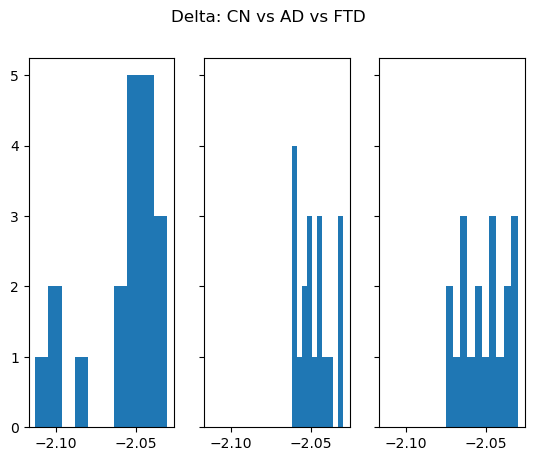

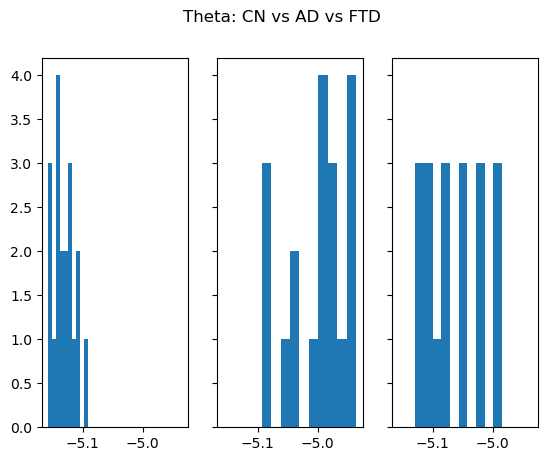

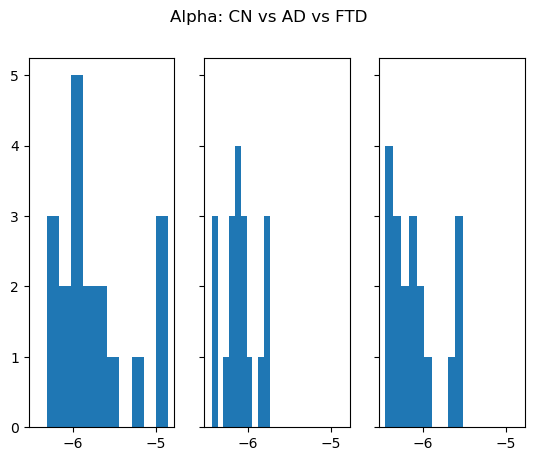

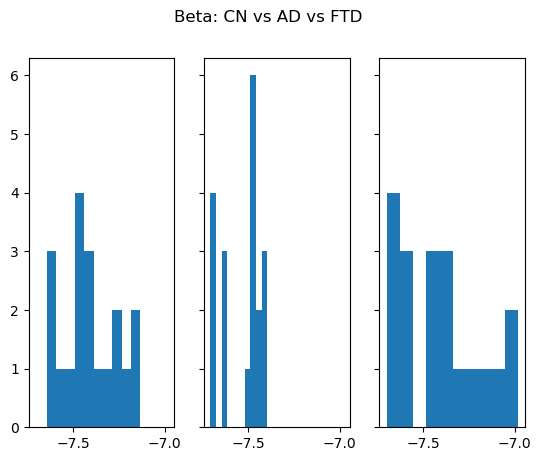

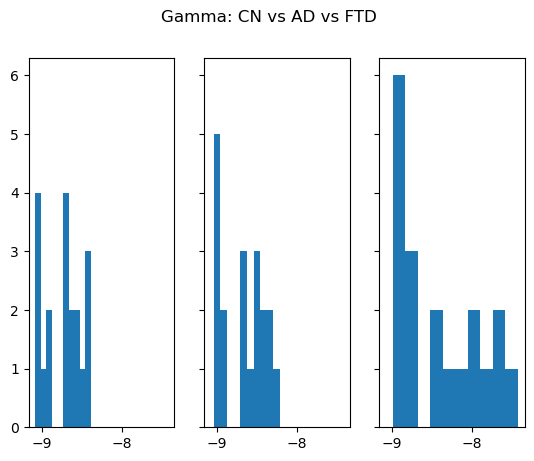

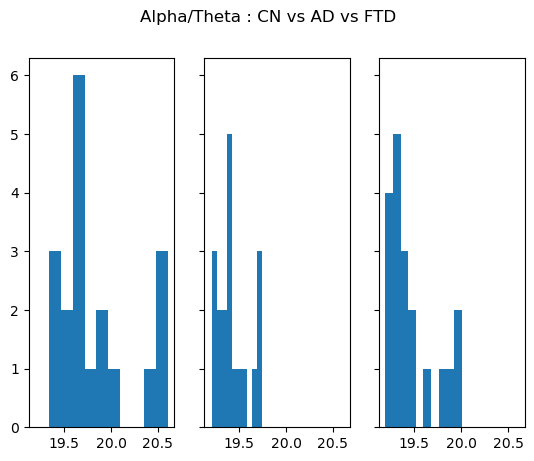

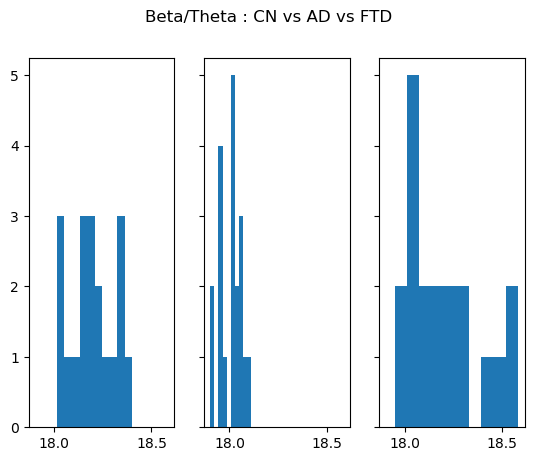

In [147]:
#Delta plot


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Delta: CN vs AD vs FTD' )
ax1.hist(np.log(cn_avg_delta))
ax2.hist(np.log(ad_avg_delta))
ax3.hist(np.log(ftd_avg_delta))

#Theta plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Theta: CN vs AD vs FTD')
ax1.hist(np.log(cn_avg_theta))
ax2.hist(np.log(ad_avg_theta))
ax3.hist(np.log(ftd_avg_theta))


#Alpha plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Alpha: CN vs AD vs FTD')
ax1.hist(np.log(cn_avg_alpha))
ax2.hist(np.log(ad_avg_alpha))
ax3.hist(np.log(ftd_avg_alpha))


#Beta plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Beta: CN vs AD vs FTD')
ax1.hist(np.log(cn_avg_beta))
ax2.hist(np.log(ad_avg_beta))
ax3.hist(np.log(ftd_avg_beta))



#Gamma plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Gamma: CN vs AD vs FTD')
ax1.hist(np.log(cn_avg_gamma))
ax2.hist(np.log(ad_avg_gamma))
ax3.hist(np.log(ftd_avg_gamma))



#Alpha/Theta plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Alpha/Theta : CN vs AD vs FTD')
ax1.hist(np.log(cn_avg_alpha_theta))
ax2.hist(np.log(ad_avg_alpha_theta))
ax3.hist(np.log(ftd_avg_alpha_theta))

#Beta/Theta plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Beta/Theta : CN vs AD vs FTD')
ax1.hist(np.log(cn_avg_beta_theta))
ax2.hist(np.log(ad_avg_beta_theta))
ax3.hist(np.log(ftd_avg_beta_theta))


In [ ]:
#Mattwhitneyu Calcs

In [611]:
#ADvsCN
delta_stat, delta_p = mannwhitneyu(Powers_All[0:36, :19].flatten(), Powers_All[36:65, :19].flatten())
theta_stat, theta_p = mannwhitneyu(Powers_All[0:36, 19:38].flatten(), Powers_All[36:65, 19:38].flatten())
alpha_stat, alpha_p = mannwhitneyu(Powers_All[0:36, 38:57].flatten(), Powers_All[36:65, 38:57].flatten())
beta_stat, beta_p = mannwhitneyu(Powers_All[0:36, 57:76].flatten(), Powers_All[36:65, 57:76].flatten())
gamma_stat, gamma_p = mannwhitneyu(Powers_All[0:36, 76:95].flatten(), Powers_All[36:65, 76:95].flatten())
alpha_theta_stat, alpha_theta_p = mannwhitneyu(Powers_All[0:36, 95:114].flatten(), Powers_All[36:65, 95:114].flatten())
beta_theta_stat, beta_theta_p = mannwhitneyu(Powers_All[0:36, 114:133].flatten(), Powers_All[36:65, 114:133].flatten())
print('Delta P = %0.10f' % (delta_p))
print('Theta P = %0.10f' % (theta_p))
print('Alpha P = %0.10f' % (alpha_p))
print('Beta P = %0.10f'  % (beta_p))
print('Gamma P = %0.10f' % (gamma_p))
print('Alpha/Theta P = %0.10f' % (alpha_theta_p))
print('Beta/Theta P = %0.10f' % (beta_theta_p))


Delta P = 0.0801699514
Theta P = 0.0000000000
Alpha P = 0.0000000000
Beta P = 0.0000000000
Gamma P = 0.9078099277
Alpha/Theta P = 0.0000000000
Beta/Theta P = 0.0000000000


In [609]:
#FTDvsCN
delta_stat, delta_p = mannwhitneyu(Powers_All[0:36, :19].flatten(), Powers_All[65:, :19].flatten())
theta_stat, theta_p = mannwhitneyu(Powers_All[0:36, 19:38].flatten(), Powers_All[65:, 19:38].flatten())
alpha_stat, alpha_p = mannwhitneyu(Powers_All[0:36, 38:57].flatten(), Powers_All[65:, 38:57].flatten())
beta_stat, beta_p = mannwhitneyu(Powers_All[0:36, 57:76].flatten(), Powers_All[65:, 57:76].flatten())
gamma_stat, gamma_p = mannwhitneyu(Powers_All[0:36, 76:95].flatten(), Powers_All[65:, 76:95].flatten())
alpha_theta_stat, alpha_theta_p = mannwhitneyu(Powers_All[0:36, 95:114].flatten(), Powers_All[65:, 95:114].flatten())
beta_theta_stat, beta_theta_p = mannwhitneyu(Powers_All[0:36, 114:133].flatten(), Powers_All[65:, 114:133].flatten())
print('Delta P = %0.10f' % (delta_p))
print('Theta P = %0.10f' % (theta_p))
print('Alpha P = %0.10f' % (alpha_p))
print('Beta P = %0.10f'  % (beta_p))
print('Gamma P = %0.10f' % (gamma_p))
print('Alpha/Theta P = %0.10f' % (alpha_theta_p))
print('Beta/Theta P = %0.10f' % (beta_theta_p))


Delta P = 0.0253677163
Theta P = 0.0000000000
Alpha P = 0.6790324469
Beta P = 0.1642328161
Gamma P = 0.0238231806
Alpha/Theta P = 0.0000036914
Beta/Theta P = 0.0000000969


In [ ]:
#p value topomaps

In [ ]:
from matplotlib import cm, colors
import matplotlib.pyplot as plt  # Need to import plt for creating subplots

vlim=[0,1]
fig, axs = plt.subplots(nrows = 3, ncols=4)
i=0
p_vals = [delta_p, theta_p, alpha_p, beta_p, gamma_p, alpha_theta_p, beta_theta_p]
band_names = [ 'Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'Alpha/Theta', 'Beta/Theta']
x=0
for i in range(2):
    for j in range(4):
        if (x<7):
            im, cm  = mne.viz.plot_topomap(p_vals[x], raw_subj_data_filt.info, axes=axs[i][j],show=False,vlim=vlim,cmap='viridis')
            axs[i][j].set_title(band_names[x])
        x+=1
# manually fiddle the position of colorbar
ax_x_start = 0.95
ax_x_width = 0.04
ax_y_start = 0.1
ax_y_height = 0.9
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=colors.Normalize(vmin=vlim[0], vmax=vlim[1]))
clb = fig.colorbar(sm, cax=cbar_ax, cmap='viridis')
axs[1][3].remove()
fig.suptitle('The P-values of the Different Features\n Between CN and AD Groups', size='x-large')
plt.show()







In [ ]:
#Avg PSD topomaps

/tmp/ipykernel_41782/2842316871.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


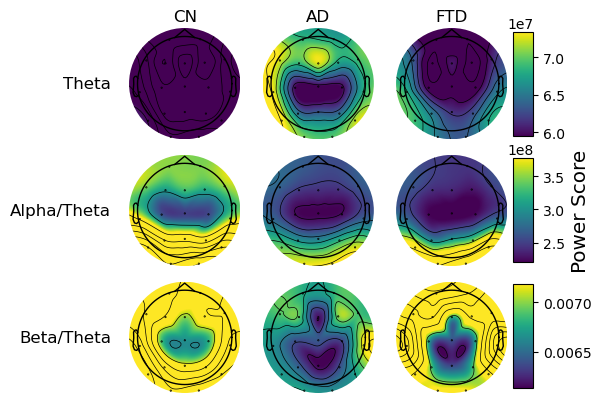

In [395]:
##### from matplotlib import cm, colors
import matplotlib.pyplot as plt  # Need to import plt for creating subplots
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

avg_bands = np.array([[cn_avg_theta, ad_avg_theta, ftd_avg_theta], [cn_avg_alpha_theta, ad_avg_alpha_theta, ftd_avg_alpha_theta], [cn_avg_beta_theta, ad_avg_beta_theta, ftd_avg_beta_theta]])
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=[5, 4])
for i in range(3):
    max_score = avg_bands[i, 1]
    vlim = [np.min(max_score), np.max(max_score)]
    for j in range(3):
            im, cm = plot_topomap(avg_bands[i][j], raw_subj_data_filt.info, axes = axs[i][j], show=False, cmap='viridis', vlim=vlim)
    ax_x_start = 0.95
    ax_x_width = 0.04
    ax_y_start = 0.315*i + 0.05
    ax_y_height = 0.26
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=colors.Normalize(vmin=vlim[0], vmax=vlim[1]))
    sm.set_array(np.linspace(*vlim))
    clb = fig.colorbar(sm, cax=cbar_ax, cmap='viridis')
    if (i==1):
        cbar_ax.yaxis.tick_right()
        cbar_ax.set_ylabel('Power Score', size='x-large')

cols = ['{}'.format(col) for col in ['CN', 'AD', 'FTD']]
rows = ['{}'.format(row) for row in band_names]


pad = 5 # in points

for ax, col in zip(axs[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need 
# to make some room. These numbers are are manually tweaked. 
# You could automatically calculate them, but it's a pain.
fig.subplots_adjust(left=0.15, top=0.950)

plt.show()


        

In [202]:
label = []
for x in range(88):
    if (x<36):
        label.append(0)
    elif (x<65):
        label.append(1)
    else:
        label.append(2)
print(label.count(0))
print(label.count(1))
print(label.count(2))
label = np.array(label)

print(label.shape)


36
29
23
(88,)


In [ ]:
#two class mach learning

In [445]:
label = []
for x in range(65):
    if (x<36):
        label.append(0)
    elif (x<65):
        label.append(1)
    else:
        label.append(2)
label = np.array(label)
#
# Define PCA for Dimensional Reduction
#
pca    = decomposition.PCA()
# Define a Standard Scaler to normalize inputs
scaler = preprocessing.StandardScaler()
# scaler = preprocessing.QuantileTransformer(output_distribution='normal', n_quantiles=50)

#
#Mach learning 
#
svc = LinearDiscriminantAnalysis()
#svc = svm.SVC(kernel = 'rbf')
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("SVC", svc)])
# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [2, 3, 5, 10, 20],
    #"SVC__C": np.logspace(-4 ,4, 20),
    #"SVC__degree": [2, 3, 5],
    #"SVC__kernel": ['linear', 'poly', 'rbf']
    #"SVC__shrinkage"   : np.logspace(-4, 0, 20),
    #"SVC__solver"      : ['lsqr','eigen']
            }

#
# Nested Fold
#
NUM_TRIALS=50
nested_scores_lda=[]
nested_scores_linear=[]
nested_scores_rbf=[]
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

    # Nested CV with parameter optimization
    clf = GridSearchCV(pipe, param_grid, n_jobs= -1, scoring='balanced_accuracy', cv=inner_cv)
    nested_score = cross_validate(clf, X=Powers_All[:65, :], y=label, cv=outer_cv, scoring=['accuracy', 'recall', 'precision', 'f1', 'balanced_accuracy'])
    nested_scores_lda.append(nested_score)
    print(i)
    
svc = svm.LinearSVC(max_iter=10**6)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("SVC", svc)])
# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [2, 3, 5, 10, 20],
    "SVC__C": np.logspace(-4 ,4, 20),
    #"SVC__degree": [2, 3, 5],
    #"SVC__kernel": ['linear', 'poly', 'rbf']
    #"SVC__shrinkage"   : np.logspace(-4, 0, 20),
    #"SVC__solver"      : ['lsqr','eigen']
}
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

    # Nested CV with parameter optimization
    clf = GridSearchCV(pipe, param_grid, n_jobs= -1, scoring='balanced_accuracy', cv=inner_cv)
    nested_score = cross_validate(clf, X=Powers_All[:65, :], y=label, cv=outer_cv, scoring=['accuracy', 'recall', 'precision', 'f1', 'balanced_accuracy'])
    nested_scores_linear.append(nested_score)
    print(i)


svc = svm.SVC(kernel = 'rbf')
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("SVC", svc)])
# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [2, 3, 5, 10, 20],
    "SVC__C": np.logspace(-4 ,4, 20),
    "SVC__degree": [2, 3, 5],
    #"SVC__kernel": ['linear', 'poly', 'rbf']
    #"SVC__shrinkage"   : np.logspace(-4, 0, 20),
    #"SVC__solver"      : ['lsqr','eigen']
}
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

    # Nested CV with parameter optimization
    clf = GridSearchCV(pipe, param_grid, n_jobs= -1, scoring='balanced_accuracy', cv=inner_cv)
    nested_score = cross_validate(clf, X=Powers_All[:65, :], y=label, cv=outer_cv, scoring=['accuracy', 'recall', 'precision', 'f1', 'balanced_accuracy'])
    nested_scores_rbf.append(nested_score)
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [613]:
#Storing two class scores

In [447]:
accuracy_lda =[]
recall_lda = []
precision_lda = []
f1_lda = []
balanced_accuracy_lda = []

accuracy_linear =[]
recall_linear = []
precision_linear = []
f1_linear = []
balanced_accuracy_linear= []


accuracy_rbf =[]
recall_rbf = []
precision_rbf = []
f1_rbf = []
balanced_accuracy_rbf = []

for i in range(NUM_TRIALS):
    accuracy_lda.append(nested_scores_lda[i]['test_accuracy'])
    recall_lda.append(nested_scores_lda[i]['test_recall'])
    precision_lda.append(nested_scores_lda[i]['test_precision'])
    f1_lda.append(nested_scores_lda[i]['test_f1'])
    balanced_accuracy_lda.append(nested_scores_lda[i]['test_balanced_accuracy'])
    
    accuracy_linear.append(nested_scores_linear[i]['test_accuracy'])
    recall_linear.append(nested_scores_linear[i]['test_recall'])
    precision_linear.append(nested_scores_linear[i]['test_precision'])
    f1_linear.append(nested_scores_linear[i]['test_f1'])
    balanced_accuracy_linear.append(nested_scores_linear[i]['test_balanced_accuracy'])

    accuracy_rbf.append(nested_scores_rbf[i]['test_accuracy'])
    recall_rbf.append(nested_scores_rbf[i]['test_recall'])
    precision_rbf.append(nested_scores_rbf[i]['test_precision'])
    f1_rbf.append(nested_scores_rbf[i]['test_f1'])
    balanced_accuracy_rbf.append(nested_scores_rbf[i]['test_balanced_accuracy'])

In [449]:
score_lda = np.array([np.array(accuracy_lda).mean(), np.array(recall_lda).mean(), np.array(precision_lda).mean(), np.array(f1_lda).mean(), np.array(balanced_accuracy_lda).mean()])
score_linear = np.array([np.array(accuracy_linear).mean(), np.array(recall_linear).mean(), np.array(precision_linear).mean(), np.array(f1_linear).mean(), np.array(balanced_accuracy_linear).mean()])
score_rbf = np.array([np.array(accuracy_rbf).mean(), np.array(recall_rbf).mean(), np.array(precision_rbf).mean(), np.array(f1_rbf).mean(), np.array(balanced_accuracy_rbf).mean()])

print(score_lda.shape)
print(score_linear.shape)
print(score_rbf.shape)

two_class_lda = (score_lda)
two_class_linear = (score_linear)
two_class_rbf = (score_rbf)

(5,)
(5,)
(5,)


In [583]:
label = []
for x in range(88):
    if (x<36):
        label.append(0)
    elif (x<65):
        label.append(1)
    else:
        label.append(2)
label = np.array(label)
#
# Define PCA for Dimensional Reduction
#
pca    = decomposition.PCA()
# Define a Standard Scaler to normalize inputs
scaler = preprocessing.StandardScaler()
# scaler = preprocessing.QuantileTransformer(output_distribution='normal', n_quantiles=50)

#
#Mach learning 
#
svc = LinearDiscriminantAnalysis()
#svc = svm.SVC(kernel = 'rbf')
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("SVC", svc)])
# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [2, 3, 5, 10, 20],
    #"SVC__C": np.logspace(-4 ,4, 20),
    #"SVC__degree": [2, 3, 5],
    #"SVC__kernel": ['linear', 'poly', 'rbf']
    #"SVC__shrinkage"   : np.logspace(-4, 0, 20),
    #"SVC__solver"      : ['lsqr','eigen']
            }

#
# Nested Fold
#
NUM_TRIALS=50
nested_scores_lda=[]
nested_scores_linear=[]
nested_scores_rbf=[]
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

    # Nested CV with parameter optimization
    clf = GridSearchCV(pipe, param_grid, n_jobs= -1, scoring='balanced_accuracy', cv=inner_cv)
    nested_score = cross_validate(clf, X=Powers_All[:88, :], y=label, cv=outer_cv, scoring=['accuracy', 'recall_micro', 'precision_micro', 'f1_micro', 'balanced_accuracy'])
    nested_scores_lda.append(nested_score)
    print(i)
    
svc = svm.LinearSVC(max_iter=10**6)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("SVC", svc)])
# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [2, 3, 5, 10, 20],
    "SVC__C": np.logspace(-4 ,4, 20),
    #"SVC__degree": [2, 3, 5],
    #"SVC__kernel": ['linear', 'poly', 'rbf']
    #"SVC__shrinkage"   : np.logspace(-4, 0, 20),
    #"SVC__solver"      : ['lsqr','eigen']
}
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

    # Nested CV with parameter optimization
    clf = GridSearchCV(pipe, param_grid, n_jobs= -1, scoring='balanced_accuracy', cv=inner_cv)
    nested_score = cross_validate(clf, X=Powers_All[:88, :], y=label, cv=outer_cv, scoring=['accuracy', 'recall_micro', 'precision_micro', 'f1_micro', 'balanced_accuracy'])
    nested_scores_linear.append(nested_score)
    print(i)


svc = svm.SVC(kernel = 'rbf')
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("SVC", svc)])
# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [2, 3, 5, 10, 20],
    "SVC__C": np.logspace(-4 ,4, 20),
    "SVC__degree": [2, 3, 5],
    #"SVC__kernel": ['linear', 'poly', 'rbf']
    #"SVC__shrinkage"   : np.logspace(-4, 0, 20),
    #"SVC__solver"      : ['lsqr','eigen']
}
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

    # Nested CV with parameter optimization
    clf = GridSearchCV(pipe, param_grid, n_jobs= -1, scoring='balanced_accuracy', cv=inner_cv)
    nested_score = cross_validate(clf, X=Powers_All[:88, :], y=label, cv=outer_cv, scoring=['accuracy', 'recall_micro', 'precision_micro', 'f1_micro', 'balanced_accuracy'])
    nested_scores_rbf.append(nested_score)
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [457]:
print(two_class_lda)
print(two_class_linear)
print(two_class_rbf)

[0.75415385 0.69506667 0.7678873  0.70880188 0.74964048]
[0.73969231 0.73493333 0.7245619  0.71091343 0.7397881 ]
[0.73107692 0.70613333 0.71471111 0.69324913 0.72860238]


In [615]:
#Storing three class scores

In [585]:
accuracy_lda =[]
recall_lda = []
precision_lda = []
f1_lda = []
balanced_accuracy_lda = []

accuracy_linear =[]
recall_linear = []
precision_linear = []
f1_linear = []
balanced_accuracy_linear= []


accuracy_rbf =[]
recall_rbf = []
precision_rbf = []
f1_rbf = []
balanced_accuracy_rbf = []

for i in range(NUM_TRIALS):
    accuracy_lda.append(nested_scores_lda[i]['test_accuracy'])
    recall_lda.append(nested_scores_lda[i]['test_recall_micro'])
    precision_lda.append(nested_scores_lda[i]['test_precision_micro'])
    f1_lda.append(nested_scores_lda[i]['test_f1_micro'])
    balanced_accuracy_lda.append(nested_scores_lda[i]['test_balanced_accuracy'])
    
    accuracy_linear.append(nested_scores_linear[i]['test_accuracy'])
    recall_linear.append(nested_scores_linear[i]['test_recall_micro'])
    precision_linear.append(nested_scores_linear[i]['test_precision_micro'])
    f1_linear.append(nested_scores_linear[i]['test_f1_micro'])
    balanced_accuracy_linear.append(nested_scores_linear[i]['test_balanced_accuracy'])

    accuracy_rbf.append(nested_scores_rbf[i]['test_accuracy'])
    recall_rbf.append(nested_scores_rbf[i]['test_recall_micro'])
    precision_rbf.append(nested_scores_rbf[i]['test_precision_micro'])
    f1_rbf.append(nested_scores_rbf[i]['test_f1_micro'])
    balanced_accuracy_rbf.append(nested_scores_rbf[i]['test_balanced_accuracy'])

In [587]:
score_lda = np.array([np.array(accuracy_lda).mean(), np.array(recall_lda).mean(), np.array(precision_lda).mean(), np.array(f1_lda).mean(), np.array(balanced_accuracy_lda).mean()])
score_linear = np.array([np.array(accuracy_linear).mean(), np.array(recall_linear).mean(), np.array(precision_linear).mean(), np.array(f1_linear).mean(), np.array(balanced_accuracy_linear).mean()])
score_rbf = np.array([np.array(accuracy_rbf).mean(), np.array(recall_rbf).mean(), np.array(precision_rbf).mean(), np.array(f1_rbf).mean(), np.array(balanced_accuracy_rbf).mean()])

print(score_lda.shape)
print(score_linear.shape)
print(score_rbf.shape)

three_class_lda = (score_lda)
three_class_linear = (score_linear)
three_class_rbf = (score_rbf)

(5,)
(5,)
(5,)


In [469]:
print(two_class_lda)
print(two_class_linear)
print(two_class_rbf)
print(three_class_lda)
print(three_class_linear)
print(three_class_rbf)

[0.75415385 0.69506667 0.7678873  0.70880188 0.74964048]
[0.73969231 0.73493333 0.7245619  0.71091343 0.7397881 ]
[0.73107692 0.70613333 0.71471111 0.69324913 0.72860238]
[0.54844444 0.54844444 0.54844444 0.54844444 0.51144127]
[0.54615686 0.54615686 0.54615686 0.54615686 0.52079048]
[0.52478431 0.52478431 0.52478431 0.52478431 0.49430794]


In [537]:
def convertToPercent(number):
    return (str(round(number*100, 2)) + '%')
    

two_class_acc = ([convertToPercent(two_class_lda[0]), convertToPercent(two_class_linear[0]), convertToPercent(two_class_rbf[0])])
two_class_recall = [convertToPercent(two_class_lda[1]), convertToPercent(two_class_linear[1]), convertToPercent(two_class_rbf[1])]
two_class_prec = [convertToPercent(two_class_lda[2]), convertToPercent(two_class_linear[2]), convertToPercent(two_class_rbf[2])]
two_class_f1 = [convertToPercent(two_class_lda[3]), convertToPercent(two_class_linear[3]), convertToPercent(two_class_rbf[3])]
two_class_bacc = [convertToPercent(two_class_lda[4]), convertToPercent(two_class_linear[4]), convertToPercent(two_class_rbf[4])]
print(two_class_acc)
print(two_class_recall)
print(two_class_prec)
print(two_class_f1)
print(two_class_bacc)


['75.42%', '73.97%', '73.11%']
['69.51%', '73.49%', '70.61%']
['76.79%', '72.46%', '71.47%']
['70.88%', '71.09%', '69.32%']
['74.96%', '73.98%', '72.86%']


In [ ]:
#two class graph

In [569]:
import openpyxl 
import pandas as pd

# Create a sample DataFrame\
data = {
    'Accuracy': two_class_acc,
    'Recall': two_class_recall,
    'Precision': two_class_prec,
    'F1 Score': two_class_f1,
    'Balanced Accuracy': two_class_bacc

}
index = ['Linear Discriminant Analysis (LDA)', 'SVM Linear Kernel', 'SVM RBF Kernel']
df = pd.DataFrame(data, index)
# Display the DataFrame as a table
(df)


,Accuracy,Recall,Precision,F1 Score,Balanced Accuracy
Linear Discriminant Analysis (LDA),75.42%,69.51%,76.79%,70.88%,74.96%
SVM Linear Kernel,73.97%,73.49%,72.46%,71.09%,73.98%
SVM RBF Kernel,73.11%,70.61%,71.47%,69.32%,72.86%


In [589]:
def convertToPercent(number):
    return (str(round(number*100, 2)) + '%')
    

three_class_acc = ([convertToPercent(three_class_lda[0]), convertToPercent(three_class_linear[0]), convertToPercent(three_class_rbf[0])])
three_class_recall = [convertToPercent(three_class_lda[1]), convertToPercent(three_class_linear[1]), convertToPercent(three_class_rbf[1])]
three_class_prec = [convertToPercent(three_class_lda[2]), convertToPercent(three_class_linear[2]), convertToPercent(three_class_rbf[2])]
three_class_f1 = [convertToPercent(three_class_lda[3]), convertToPercent(three_class_linear[3]), convertToPercent(three_class_rbf[3])]
three_class_bacc = [convertToPercent(three_class_lda[4]), convertToPercent(three_class_linear[4]), convertToPercent(three_class_rbf[4])]
print(three_class_acc)
print(three_class_recall)
print(three_class_prec)
print(three_class_f1)
print(three_class_bacc)

['54.84%', '54.62%', '52.48%']
['54.84%', '54.62%', '52.48%']
['54.84%', '54.62%', '52.48%']
['54.84%', '54.62%', '52.48%']
['51.14%', '52.08%', '49.43%']


In [ ]:
#three class graph

In [581]:
import pandas as pd
# Create a sample DataFrame\
data = {
    'Accuracy': three_class_acc,
    'Recall': three_class_recall,
    'Precision': three_class_prec,
    'F1 Score': three_class_f1,
    'Balanced Accuracy': three_class_bacc

}
index = ['Linear Discriminant Analysis (LDA)', 'SVM Linear Kernel', 'SVM RBF Kernel']
df = pd.DataFrame(data, index)
# Display the DataFrame as a table
(df)

,Accuracy,Recall,Precision,F1 Score,Balanced Accuracy
Linear Discriminant Analysis (LDA),54.84%,54.84%,54.84%,54.84%,51.14%
SVM Linear Kernel,54.62%,54.62%,54.62%,54.62%,52.08%
SVM RBF Kernel,52.48%,52.48%,52.48%,52.48%,49.43%


In [563]:
import sys
!{sys.executable} -m pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.4/251.4 kB 3.2 MB/s eta 0:00:00 0:00:01
